Случай полной априорной информации.


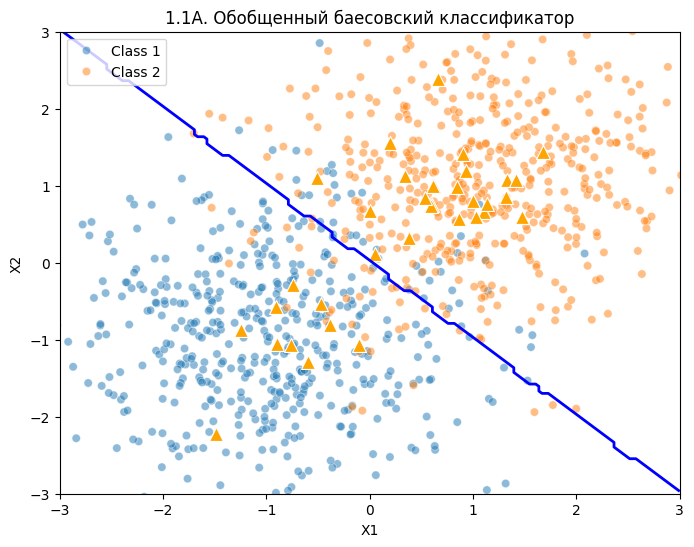

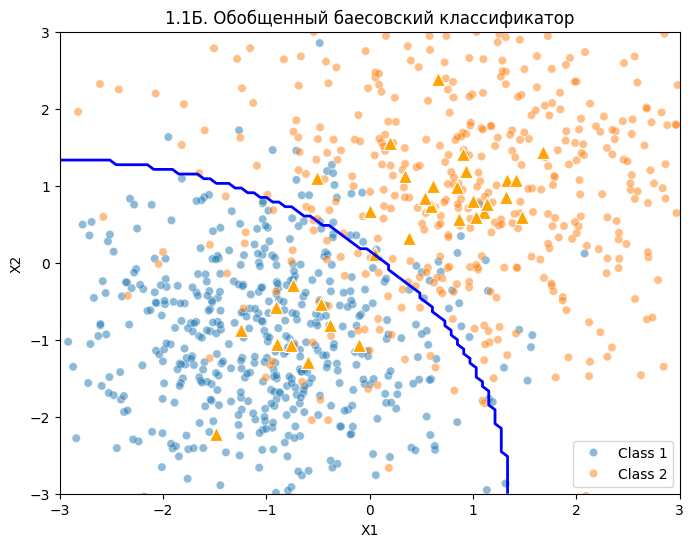

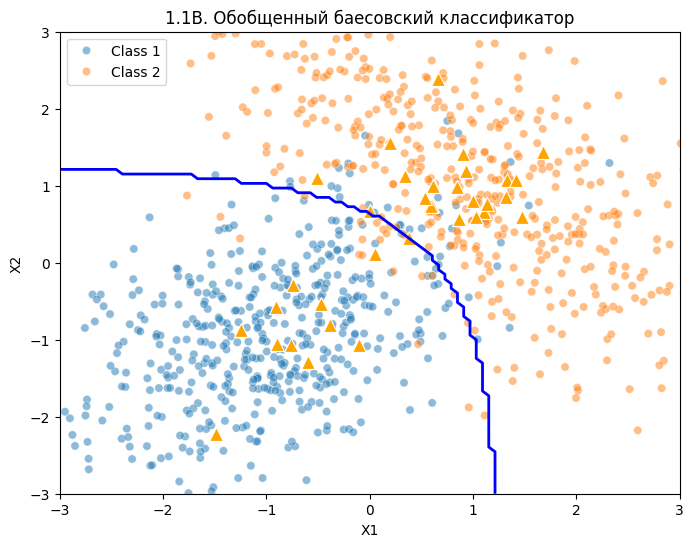

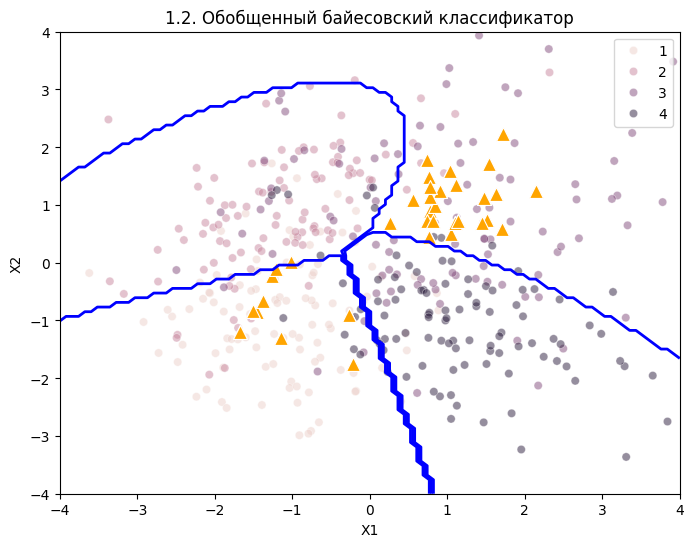

Случай априорной неопределенности.


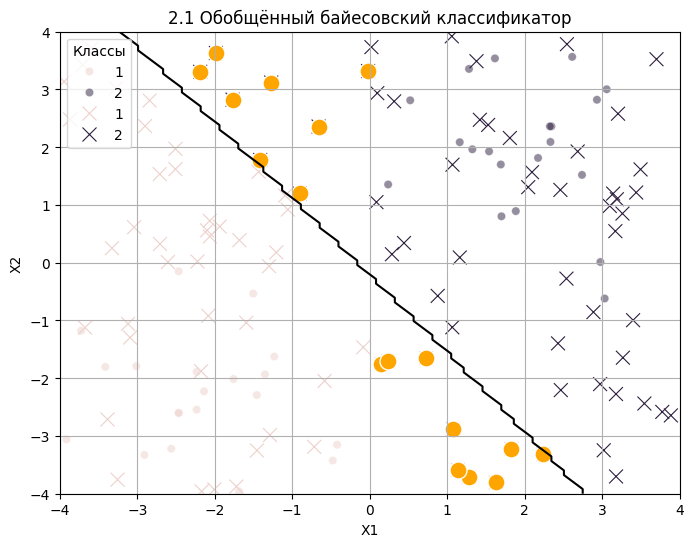

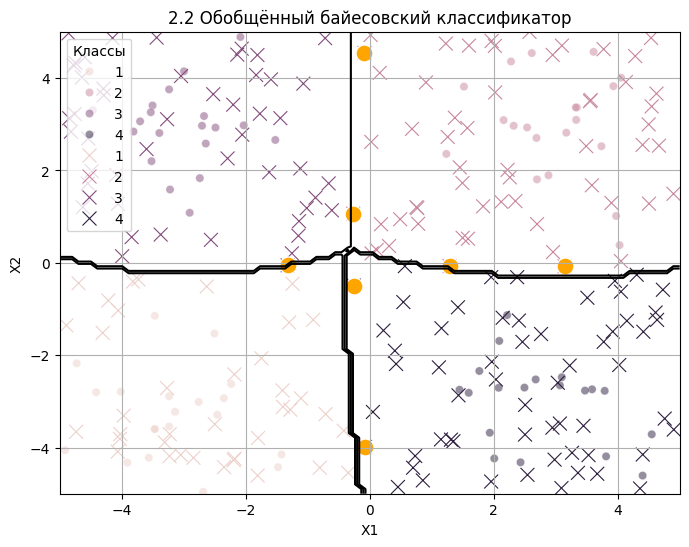

Оценивание ошибок.
Случай априорной неопределенности.
1.Вероятность ошибки (оцененная): 0.4750
Теоретическая вероятность ошибки: 0.5000
Интервальная оценка вероятности ошибки: [0.4048, 0.5451]
2.Вероятность ошибки (оцененная): 0.0350
Теоретическая вероятность ошибки: 0.7500
Интервальная оценка вероятности ошибки: [0.0165, 0.0716]
Случай полной априорной информации.
1А. Вероятность ошибки (оцененная): 0.2900
Теоретическая вероятность ошибки: 0.5000
Интервальная оценка вероятности ошибки: [0.2295, 0.3573]
1Б. Вероятность ошибки (оцененная): 0.1150
Теоретическая вероятность ошибки: 0.5000
Интервальная оценка вероятности ошибки: [0.0768, 0.1670]
1В. Вероятность ошибки (оцененная): 0.1400
Теоретическая вероятность ошибки: 0.5000
Интервальная оценка вероятности ошибки: [0.0967, 0.1946]

2.Вероятность ошибки (оцененная): 0.7000
Теоретическая вероятность ошибки: 0.7500
Интервальная оценка вероятности ошибки: [0.6327, 0.7604]



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

# Случай полной априорной информации.
print("Случай полной априорной информации.")
# Номер 1. Вариант А.
# Функция для классификации с использованием обобщенного байесовского классификатора
def predict_class(x1, x2, mu1, sigma1, mu2, sigma2, mu3=None, sigma3=None, mu4=None, sigma4=None, prior=None):
    prob1 = multivariate_normal.pdf([x1, x2], mean=mu1, cov=sigma1) * prior[0] if prior is not None else multivariate_normal.pdf([x1, x2], mean=mu1, cov=sigma1)
    prob2 = multivariate_normal.pdf([x1, x2], mean=mu2, cov=sigma2) * prior[1] if prior is not None else multivariate_normal.pdf([x1, x2], mean=mu2, cov=sigma2)
    if mu3 is not None and sigma3 is not None:
        prob3 = multivariate_normal.pdf([x1, x2], mean=mu3, cov=sigma3) * prior[2] if prior is not None else multivariate_normal.pdf([x1, x2], mean=mu3, cov=sigma3)
    else:
        prob3 = 0
    if mu4 is not None and sigma4 is not None:
        prob4 = multivariate_normal.pdf([x1, x2], mean=mu4, cov=sigma4) * prior[3] if prior is not None else multivariate_normal.pdf([x1, x2], mean=mu4, cov=sigma4)
    else:
        prob4 = 0
    return np.argmax([prob1, prob2, prob3, prob4]) + 1


# Вариант А
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[1, 0], [0, 1]])

np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, sigma1, 500)
class2_points = np.random.multivariate_normal(mu2, sigma2, 500)

data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1]]),
    'class': np.concatenate([np.repeat('Class 1', len(class1_points)), np.repeat('Class 2', len(class2_points))])
})

misclassified_points = pd.DataFrame({
    'x': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)]),
    'y': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)])
})

misclassified_points['class'] = misclassified_points.apply(lambda row: predict_class(row['x'], row['y'], mu1, sigma1, mu2, sigma2), axis=1)

# Генерация сетки для отображения границы
x_seq = np.linspace(-3, 3, 100)
y_seq = np.linspace(-3, 3, 100)
grid_x, grid_y = np.meshgrid(x_seq, y_seq)
grid = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_classes = np.array([predict_class(x, y, mu1, sigma1, mu2, sigma2) for x, y in grid])

grid_df = pd.DataFrame(grid, columns=['x1', 'x2'])
grid_df['class'] = grid_classes

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_points, x='x', y='y', hue='class', alpha=0.5)
sns.scatterplot(data=misclassified_points[misclassified_points['class'] != 1], x='x', y='y', color='orange', s=100, marker='^')
sns.scatterplot(data=misclassified_points[misclassified_points['class'] != 2], x='x', y='y', color='orange', s=100, marker='^')

Z = grid_df['class'].values.reshape(grid_x.shape)
plt.contour(grid_x, grid_y, Z, levels=[1.5], colors='blue', linewidths=2)
plt.title('1.1А. Обобщенный баесовский классификатор')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


# Вариант Б
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[2, 0], [0, 2]])

np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, sigma1, 500)
class2_points = np.random.multivariate_normal(mu2, sigma2, 500)

data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1]]),
    'class': np.concatenate([np.repeat('Class 1', len(class1_points)), np.repeat('Class 2', len(class2_points))])
})

misclassified_points = pd.DataFrame({
    'x': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)]),
    'y': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)])
})

misclassified_points['class'] = misclassified_points.apply(lambda row: predict_class(row['x'], row['y'], mu1, sigma1, mu2, sigma2), axis=1)

# Генерация сетки для отображения границы
grid_x, grid_y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_classes = np.array([predict_class(x, y, mu1, sigma1, mu2, sigma2) for x, y in grid])

grid_df = pd.DataFrame(grid, columns=['x1', 'x2'])
grid_df['class'] = grid_classes

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_points, x='x', y='y', hue='class', alpha=0.5)
sns.scatterplot(data=misclassified_points[misclassified_points['class'] != 1], x='x', y='y', color='orange', s=100, marker='^')
sns.scatterplot(data=misclassified_points[misclassified_points['class'] != 2], x='x', y='y', color='orange', s=100, marker='^')

Z = grid_df['class'].values.reshape(grid_x.shape)
plt.contour(grid_x, grid_y, Z, levels=[1.5], colors='blue', linewidths=2)
plt.title('1.1Б. Обобщенный баесовский классификатор')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# Вариант В
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
sigma1 = np.array([[1, 0.5], [0.5, 1]])
sigma2 = np.array([[2, -1.5], [-1.5, 2]])

np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, sigma1, 500)
class2_points = np.random.multivariate_normal(mu2, sigma2, 500)

data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1]]),
    'class': np.concatenate([np.repeat('Class 1', len(class1_points)), np.repeat('Class 2', len(class2_points))])
})

misclassified_points = pd.DataFrame({
    'x': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)]),
    'y': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)])
})

misclassified_points['class'] = misclassified_points.apply(lambda row: predict_class(row['x'], row['y'], mu1, sigma1, mu2, sigma2), axis=1)

# Генерация сетки для отображения границы
grid_x, grid_y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_classes = np.array([predict_class(x, y, mu1, sigma1, mu2, sigma2) for x, y in grid])

grid_df = pd.DataFrame(grid, columns=['x1', 'x2'])
grid_df['class'] = grid_classes

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_points, x='x', y='y', hue='class', alpha=0.5)
sns.scatterplot(data=misclassified_points[misclassified_points['class'] != 1], x='x', y='y', color='orange', s=100, marker='^')
sns.scatterplot(data=misclassified_points[misclassified_points['class'] != 2], x='x', y='y', color='orange', s=100, marker='^')

Z = grid_df['class'].values.reshape(grid_x.shape)
plt.contour(grid_x, grid_y, Z, levels=[1.5], colors='blue', linewidths=2)
plt.title('1.1В. Обобщенный баесовский классификатор')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


# Номер 2
mu1 = np.array([-1, -1])
mu2 = np.array([-1, 1])
mu3 = np.array([1, 1])
mu4 = np.array([1, -1])

sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[1, 0.5], [0.5, 1]])
sigma3 = np.array([[2, 0], [0, 2]])
sigma4 = np.array([[1, -0.5], [-0.5, 1]])

np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, sigma1, 100)
class2_points = np.random.multivariate_normal(mu2, sigma2, 100)
class3_points = np.random.multivariate_normal(mu3, sigma3, 100)
class4_points = np.random.multivariate_normal(mu4, sigma4, 100)

data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0], class3_points[:, 0], class4_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1], class3_points[:, 1], class4_points[:, 1]]),
    'class': np.concatenate([np.repeat(1, len(class1_points)), np.repeat(2, len(class2_points)),
                             np.repeat(3, len(class3_points)), np.repeat(4, len(class4_points))])
})

misclassified_points = pd.DataFrame({
    'x': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)]),
    'y': np.concatenate([np.random.normal(1, 0.5, 25), np.random.normal(-1, 0.5, 10)])
})

prior = [0.25, 0.25, 0.25, 0.25]

misclassified_points['class'] = misclassified_points.apply(lambda row: predict_class(
    row['x'], row['y'], mu1, sigma1, mu2, sigma2, mu3, sigma3, mu4, sigma4, prior), axis=1)

grid_x, grid_y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_classes = np.array([predict_class(x, y, mu1, sigma1, mu2, sigma2, mu3, sigma3, mu4, sigma4, prior) for x, y in grid])

grid_df = pd.DataFrame(grid, columns=['x1', 'x2'])
grid_df['class'] = grid_classes

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_points, x='x', y='y', hue='class', alpha=0.5)

# Отображение ошибочных точек
for class_num in [1, 2, 3, 4]:
    sns.scatterplot(data=misclassified_points[misclassified_points['class'] != class_num], x='x', y='y', color='orange', s=100, marker='^')

# Отображение границы
Z = grid_df['class'].values.reshape(grid_x.shape)
plt.contour(grid_x, grid_y, Z, levels=np.arange(1, 5), colors='blue', linewidths=2)

plt.title('1.2. Обобщенный байесовский классификатор')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

# Случай априорной неопределенности.
print("Случай априорной неопределенности.")
# Номер 1.
np.random.seed(42)

# Генерация данных для классов
class1_points = pd.DataFrame({
    'x': np.random.normal(-2, 1, 20),
    'y': np.random.normal(-2, 1, 20)
})
class2_points = pd.DataFrame({
    'x': np.random.normal(2, 1, 20),
    'y': np.random.normal(2, 1, 20)
})

# Объединение данных в один DataFrame
data_points = pd.concat([class1_points.assign(class_=1), class2_points.assign(class_=2)], ignore_index=True)

# Рассчитываем параметры для каждого класса
params = data_points.groupby('class_').agg({'x': ['mean', 'std'], 'y': ['mean', 'std']})

# Вычисление априорных вероятностей
prior_prob = data_points['class_'].value_counts() / len(data_points)

# Функция для вычисления апостериорной вероятности
def posterior_prob(x1, x2):
    probs = []
    for i in range(1, len(prior_prob) + 1):
        mean_x, std_x = params[('x', 'mean')][i], params[('x', 'std')][i]
        mean_y, std_y = params[('y', 'mean')][i], params[('y', 'std')][i]
        likelihood = multivariate_normal.pdf([x1, x2], mean=[mean_x, mean_y], cov=[[std_x**2, 0], [0, std_y**2]])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса
def predict_class(x1, x2):
    probs = posterior_prob(x1, x2)
    return np.argmax(probs) + 1  # Возвращаем класс с максимальной вероятностью

# Генерация тестовых точек
test_points = pd.DataFrame({
    'x': np.random.uniform(-4, 4, 100),
    'y': np.random.uniform(-4, 4, 100)
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек (условное разделение)
test_points['true_class'] = np.where(test_points['x'] < 0, 1, 2)

# Генерация сетки для контуров
x_seq = np.linspace(-4, 4, 100)
y_seq = np.linspace(-4, 4, 100)
grid_x, grid_y = np.meshgrid(x_seq, y_seq)
grid = np.c_[grid_x.ravel(), grid_y.ravel()]

# Предсказание классов для сетки
grid_class = np.array([predict_class(x, y) for x, y in grid])
grid_class = grid_class.reshape(grid_x.shape)

# Построение графика
plt.figure(figsize=(8, 6))

# Основные точки
sns.scatterplot(data=data_points, x='x', y='y', hue='class_', alpha=0.5)

# Тестовые точки
sns.scatterplot(data=test_points, x='x', y='y', hue='class', marker='x', s=100)

# Ошибочные точки
errors = test_points[test_points['class'] != test_points['true_class']]
sns.scatterplot(data=errors, x='x', y='y', color='orange', s=150, marker='o')

# Контуры классов
plt.contour(grid_x, grid_y, grid_class, levels=[1.5, 2.5], colors='black')

# Настройки графика
plt.title("2.1 Обобщённый байесовский классификатор")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(title='Классы', loc='upper left')
plt.grid(True)
plt.show()


# Номер 2
np.random.seed(42)
class1_points = pd.DataFrame({
    'x': np.random.normal(-3, 1, 20),
    'y': np.random.normal(-3, 1, 20)
})
class2_points = pd.DataFrame({
    'x': np.random.normal(3, 1, 20),
    'y': np.random.normal(3, 1, 20)
})
class3_points = pd.DataFrame({
    'x': np.random.normal(-3, 1, 20),
    'y': np.random.normal(3, 1, 20)
})
class4_points = pd.DataFrame({
    'x': np.random.normal(3, 1, 20),
    'y': np.random.normal(-3, 1, 20)
})

data_points = pd.concat([
    class1_points.assign(class_=1),
    class2_points.assign(class_=2),
    class3_points.assign(class_=3),
    class4_points.assign(class_=4)
], ignore_index=True)

# Рассчитываем параметры для каждого класса
params = data_points.groupby('class_').agg({'x': ['mean', 'std'], 'y': ['mean', 'std']})

# Вычисление априорных вероятностей
prior_prob = data_points['class_'].value_counts() / len(data_points)

# Функция для вычисления апостериорной вероятности для 4 классов
def posterior_prob_4classes(x1, x2):
    probs = []
    for i in range(1, len(prior_prob) + 1):
        mean_x, std_x = params[('x', 'mean')][i], params[('x', 'std')][i]
        mean_y, std_y = params[('y', 'mean')][i], params[('y', 'std')][i]
        likelihood = multivariate_normal.pdf([x1, x2], mean=[mean_x, mean_y], cov=[[std_x**2, 0], [0, std_y**2]])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса
def predict_class_4classes(x1, x2):
    probs = posterior_prob_4classes(x1, x2)
    return np.argmax(probs) + 1

# Генерация тестовых точек для 4 классов
test_points = pd.DataFrame({
    'x': np.random.uniform(-5, 5, 200),
    'y': np.random.uniform(-5, 5, 200)
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class_4classes(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек (условное разделение)
test_points['true_class'] = test_points.apply(lambda row: 1 if row['x'] < 0 and row['y'] < 0 else 
                                                     (2 if row['x'] > 0 and row['y'] > 0 else 
                                                      (3 if row['x'] < 0 and row['y'] > 0 else 4)), axis=1)

# Генерация сетки для контуров
x_seq = np.linspace(-5, 5, 100)
y_seq = np.linspace(-5, 5, 100)
grid_x, grid_y = np.meshgrid(x_seq, y_seq)
grid = np.c_[grid_x.ravel(), grid_y.ravel()]

# Предсказание классов для сетки
grid_class = np.array([predict_class_4classes(x, y) for x, y in grid])
grid_class = grid_class.reshape(grid_x.shape)

# Построение графика
plt.figure(figsize=(8, 6))

# Основные точки
sns.scatterplot(data=data_points, x='x', y='y', hue='class_', alpha=0.5)

# Тестовые точки
sns.scatterplot(data=test_points, x='x', y='y', hue='class', marker='x', s=100)

# Ошибочные точки
errors = test_points[test_points['class'] != test_points['true_class']]
sns.scatterplot(data=errors, x='x', y='y', color='orange', s=150, marker='o')

# Контуры классов
plt.contour(grid_x, grid_y, grid_class, levels=[1.5, 2.5, 3.5, 4.5], colors='black')

# Настройки графика
plt.title("2.2 Обобщённый байесовский классификатор")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend(title='Классы', loc='upper left')
plt.grid(True)
plt.show()

# Оценивание ошибок.
# Случай априорной неопределенности.
print("Оценивание ошибок.\nСлучай априорной неопределенности.")

# Номер 1
np.random.seed(42)

# Генерация данных для классов
class1_points = pd.DataFrame({
    'x': np.random.normal(-2, 1, 20),
    'y': np.random.normal(-2, 1, 20)
})
class2_points = pd.DataFrame({
    'x': np.random.normal(2, 1, 20),
    'y': np.random.normal(2, 1, 20)
})

# Объединение данных в один DataFrame
data_points = pd.concat([class1_points.assign(class_=1), class2_points.assign(class_=2)], ignore_index=True)

# Рассчитываем параметры для каждого класса
params = data_points.groupby('class_').agg({'x': ['mean', 'std'], 'y': ['mean', 'std']})

# Вычисление априорных вероятностей
prior_prob = data_points['class_'].value_counts() / len(data_points)

# Функция для вычисления апостериорной вероятности
def posterior_prob(x1, x2):
    probs = []
    for i in range(1, len(prior_prob) + 1):
        mean_x, std_x = params[('x', 'mean')][i], params[('x', 'std')][i]
        mean_y, std_y = params[('y', 'mean')][i], params[('y', 'std')][i]
        likelihood = multivariate_normal.pdf([x1, x2], mean=[mean_x, mean_y], cov=[[std_x**2, 0], [0, std_y**2]])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса
def predict_class(x1, x2):
    probs = posterior_prob(x1, x2)
    return np.argmax(probs) + 1  # Возвращаем класс с максимальной вероятностью

# Генерация тестовых точек
test_points = pd.DataFrame({
    'x': np.random.uniform(-5, 5, 200),
    'y': np.random.uniform(-5, 5, 200)
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек (условное разделение)
test_points['true_class'] = test_points.apply(lambda row: 1 if row['x'] < 0 and row['y'] < 0 else 
                                                     (2 if row['x'] > 0 and row['y'] > 0 else 
                                                      (3 if row['x'] < 0 and row['y'] > 0 else 4)), axis=1)

# Вероятность ошибки
error_rate = np.mean(test_points['class'] != test_points['true_class'])

# Теоретическая вероятность ошибки
theoretical_error_rate = 1 - np.sum(prior_prob**2)  # Для двух классов

# Интервальная оценка вероятности ошибки
n = len(test_points)
alpha = 0.05
error_count = np.sum(test_points['class'] != test_points['true_class'])
lower, upper = proportion_confint(error_count, n, alpha=alpha, method='binom_test')

print(f"1.Вероятность ошибки (оцененная): {error_rate:.4f}")
print(f"Теоретическая вероятность ошибки: {theoretical_error_rate:.4f}")
print(f"Интервальная оценка вероятности ошибки: [{lower:.4f}, {upper:.4f}]")

# Номер 2
np.random.seed(42)
class1_points = pd.DataFrame({
    'x': np.random.normal(-3, 1, 20),
    'y': np.random.normal(-3, 1, 20)
})
class2_points = pd.DataFrame({
    'x': np.random.normal(3, 1, 20),
    'y': np.random.normal(3, 1, 20)
})
class3_points = pd.DataFrame({
    'x': np.random.normal(-3, 1, 20),
    'y': np.random.normal(3, 1, 20)
})
class4_points = pd.DataFrame({
    'x': np.random.normal(3, 1, 20),
    'y': np.random.normal(-3, 1, 20)
})

data_points = pd.concat([
    class1_points.assign(class_=1),
    class2_points.assign(class_=2),
    class3_points.assign(class_=3),
    class4_points.assign(class_=4)
], ignore_index=True)

# Рассчитываем параметры для каждого класса
params = data_points.groupby('class_').agg({'x': ['mean', 'std'], 'y': ['mean', 'std']})

# Вычисление априорных вероятностей
prior_prob = data_points['class_'].value_counts() / len(data_points)

# Функция для предсказания класса для 4 классов
def posterior_prob_4classes(x1, x2):
    probs = []
    for i in range(1, len(prior_prob) + 1):
        mean_x, std_x = params[('x', 'mean')][i], params[('x', 'std')][i]
        mean_y, std_y = params[('y', 'mean')][i], params[('y', 'std')][i]
        likelihood = multivariate_normal.pdf([x1, x2], mean=[mean_x, mean_y], cov=[[std_x**2, 0], [0, std_y**2]])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса для 4 классов
def predict_class_4classes(x1, x2):
    probs = posterior_prob_4classes(x1, x2)
    return np.argmax(probs) + 1

# Генерация тестовых точек для 4 классов
test_points = pd.DataFrame({
    'x': np.random.uniform(-5, 5, 200),
    'y': np.random.uniform(-5, 5, 200)
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class_4classes(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек (условное разделение)
test_points['true_class'] = test_points.apply(lambda row: 1 if row['x'] < 0 and row['y'] < 0 else 
                                                     (2 if row['x'] > 0 and row['y'] > 0 else 
                                                      (3 if row['x'] < 0 and row['y'] > 0 else 4)), axis=1)

# Вероятность ошибки
error_rate = np.mean(test_points['class'] != test_points['true_class'])

# Теоретическая вероятность ошибки
theoretical_error_rate = np.sum(prior_prob * (1 - prior_prob))  # Для простоты, считаем равновероятные классы

# Интервальная оценка вероятности ошибки
n = len(test_points)
alpha = 0.05
error_count = np.sum(test_points['class'] != test_points['true_class'])
lower, upper = proportion_confint(error_count, n, alpha=alpha, method='binom_test')

print(f"2.Вероятность ошибки (оцененная): {error_rate:.4f}")
print(f"Теоретическая вероятность ошибки: {theoretical_error_rate:.4f}")
print(f"Интервальная оценка вероятности ошибки: [{lower:.4f}, {upper:.4f}]")

# Случай полной априорной информации.
print("Случай полной априорной информации.")
# Номер 1. Вариант A
prior_prob = np.array([0.5, 0.5])
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
cov1 = np.array([[1, 0], [0, 1]])
cov2 = np.array([[1, 0], [0, 1]])

# Генерация данных для классов
np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, cov1, 500)
class2_points = np.random.multivariate_normal(mu2, cov2, 500)

# Объединение данных в один DataFrame
data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1]]),
    'class_': np.concatenate([np.ones(500), np.ones(500) * 2])
})

# Параметры для классов
params = [
    {'mean': mu1, 'cov': cov1},
    {'mean': mu2, 'cov': cov2}
]

# Функция для вычисления апостериорной вероятности
def posterior_prob(x1, x2):
    probs = []
    for i, param in enumerate(params):
        likelihood = multivariate_normal.pdf([x1, x2], mean=param['mean'], cov=param['cov'])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса
def predict_class(x1, x2):
    probs = posterior_prob(x1, x2)
    return np.argmax(probs) + 1  # Возвращаем класс с максимальной вероятностью

# Генерация тестовых точек
test_points = pd.DataFrame({
    'x': np.random.uniform(-5, 5, 200),
    'y': np.random.uniform(-5, 5, 200)
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек (условное разделение)
test_points['true_class'] = np.where((test_points['x'] < 0) & (test_points['y'] < 0), 1, 2)

# Вероятность ошибки
error_rate = np.mean(test_points['class'] != test_points['true_class'])

# Теоретическая вероятность ошибки
theoretical_error_rate = 1 - np.sum(prior_prob ** 2)

# Интервальная оценка вероятности ошибки
n = len(test_points)
alpha = 0.05
error_count = np.sum(test_points['class'] != test_points['true_class'])
lower, upper = proportion_confint(error_count, n, alpha=alpha, method='binom_test')

# Результаты
print(f"1А. Вероятность ошибки (оцененная): {error_rate:.4f}")
print(f"Теоретическая вероятность ошибки: {theoretical_error_rate:.4f}")
print(f"Интервальная оценка вероятности ошибки: [{lower:.4f}, {upper:.4f}]")

# Номер 1. Вариант Б
prior_prob = np.array([0.5, 0.5])
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
cov1 = np.array([[1, 0], [0, 1]])
cov2 = np.array([[2, 0], [0, 2]])

# Генерация данных для классов
np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, cov1, 500)
class2_points = np.random.multivariate_normal(mu2, cov2, 500)

# Объединение данных в один DataFrame
data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1]]),
    'class_': np.concatenate([np.ones(500), np.ones(500) * 2])
})

# Параметры для классов
params = [
    {'mean': mu1, 'cov': cov1},
    {'mean': mu2, 'cov': cov2}
]

# Функция для вычисления апостериорной вероятности
def posterior_prob(x1, x2):
    probs = []
    for i, param in enumerate(params):
        likelihood = multivariate_normal.pdf([x1, x2], mean=param['mean'], cov=param['cov'])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса
def predict_class(x1, x2):
    probs = posterior_prob(x1, x2)
    return np.argmax(probs) + 1

# Генерация тестовых точек
test_points = pd.DataFrame({
    'x': np.random.uniform(-5, 5, 200),
    'y': np.random.uniform(-5, 5, 200)
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек
test_points['true_class'] = np.where((test_points['x'] < 0) & (test_points['y'] < 0), 1, 2)

# Вероятность ошибки
error_rate = np.mean(test_points['class'] != test_points['true_class'])

# Теоретическая вероятность ошибки
theoretical_error_rate = 1 - np.sum(prior_prob ** 2)

# Интервальная оценка вероятности ошибки
n = len(test_points)
error_count = np.sum(test_points['class'] != test_points['true_class'])
lower, upper = proportion_confint(error_count, n, alpha=0.05, method='binom_test')

# Результаты
print(f"1Б. Вероятность ошибки (оцененная): {error_rate:.4f}")
print(f"Теоретическая вероятность ошибки: {theoretical_error_rate:.4f}")
print(f"Интервальная оценка вероятности ошибки: [{lower:.4f}, {upper:.4f}]")

# Номер 1. Вариант В
prior_prob = np.array([0.5, 0.5])
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
cov1 = np.array([[1, 0.5], [0.5, 1]])
cov2 = np.array([[2, -1.5], [-1.5, 2]])

# Генерация данных для классов
np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, cov1, 500)
class2_points = np.random.multivariate_normal(mu2, cov2, 500)

# Объединение данных в один DataFrame
data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1]]),
    'class_': np.concatenate([np.ones(500), np.ones(500) * 2])
})

# Параметры для классов
params = [
    {'mean': mu1, 'cov': cov1},
    {'mean': mu2, 'cov': cov2}
]

# Функция для вычисления апостериорной вероятности
def posterior_prob(x1, x2):
    probs = []
    for i, param in enumerate(params):
        likelihood = multivariate_normal.pdf([x1, x2], mean=param['mean'], cov=param['cov'])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса
def predict_class(x1, x2):
    probs = posterior_prob(x1, x2)
    return np.argmax(probs) + 1

# Генерация тестовых точек
test_points = pd.DataFrame({
    'x': np.random.uniform(-5, 5, 200),
    'y': np.random.uniform(-5, 5, 200)
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек
test_points['true_class'] = np.where((test_points['x'] < 0) & (test_points['y'] < 0), 1, 2)

# Вероятность ошибки
error_rate = np.mean(test_points['class'] != test_points['true_class'])

# Теоретическая вероятность ошибки
theoretical_error_rate = 1 - np.sum(prior_prob ** 2)

# Интервальная оценка вероятности ошибки
n = len(test_points)
error_count = np.sum(test_points['class'] != test_points['true_class'])
lower, upper = proportion_confint(error_count, n, alpha=0.05, method='binom_test')

# Результаты
print(f"1В. Вероятность ошибки (оцененная): {error_rate:.4f}")
print(f"Теоретическая вероятность ошибки: {theoretical_error_rate:.4f}")
print(f"Интервальная оценка вероятности ошибки: [{lower:.4f}, {upper:.4f}]\n")

# Номер 2
prior_prob = np.array([0.25, 0.25, 0.25, 0.25])
mu1 = np.array([-1, -1])            
mu2 = np.array([-1, 1])              
mu3 = np.array([1, 1])             
mu4 = np.array([1, -1])             
cov_matrix1 = np.array([[1, 0], [0, 1]])
cov_matrix2 = np.array([[1, 0.5], [0.5, 1]])
cov_matrix3 = np.array([[2, 0], [0, 2]])
cov_matrix4 = np.array([[1, -0.5], [-0.5, 1]])

# Генерация данных для классов
np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, cov_matrix1, 20)
class2_points = np.random.multivariate_normal(mu2, cov_matrix2, 20)
class3_points = np.random.multivariate_normal(mu3, cov_matrix3, 20)
class4_points = np.random.multivariate_normal(mu4, cov_matrix4, 20)

# Объединение данных в один DataFrame
data_points = pd.DataFrame({
    'x': np.concatenate([class1_points[:, 0], class2_points[:, 0], class3_points[:, 0], class4_points[:, 0]]),
    'y': np.concatenate([class1_points[:, 1], class2_points[:, 1], class3_points[:, 1], class4_points[:, 1]]),
    'class_': np.concatenate([np.ones(20), np.ones(20)*2, np.ones(20)*3, np.ones(20)*4])
})

# Параметры для классов
params = [
    {'mean': mu1, 'cov': cov_matrix1},
    {'mean': mu2, 'cov': cov_matrix2},
    {'mean': mu3, 'cov': cov_matrix3},
    {'mean': mu4, 'cov': cov_matrix4}
]

# Функция для вычисления апостериорной вероятности
def posterior_prob(x1, x2):
    probs = []
    for i, param in enumerate(params):
        likelihood = multivariate_normal.pdf([x1, x2], mean=param['mean'], cov=param['cov'])
        probs.append(likelihood * prior_prob[i])
    return np.array(probs) / np.sum(probs)

# Функция для предсказания класса
def predict_class(x1, x2):
    probs = posterior_prob(x1, x2)
    return np.argmax(probs) + 1

# Генерация тестовых точек
test_points = pd.DataFrame({
    'x': np.concatenate([np.random.uniform(-5, -1, 50), np.random.uniform(1, 5, 50), np.random.uniform(-5, -1, 50), np.random.uniform(1, 5, 50)]),
    'y': np.concatenate([np.random.uniform(-5, -1, 50), np.random.uniform(1, 5, 50), np.random.uniform(1, 5, 50), np.random.uniform(-5, -1, 50)])
})

# Предсказание классов для тестовых точек
test_points['class'] = test_points.apply(lambda row: predict_class(row['x'], row['y']), axis=1)

# Истинный класс для тестовых точек
test_points['true_class'] = np.where((test_points['x'] < 0) & (test_points['y'] < 0), 1, 2)

# Вероятность ошибки
error_rate = np.mean(test_points['class'] != test_points['true_class'])

# Теоретическая вероятность ошибки
theoretical_error_rate = 1 - np.sum(prior_prob ** 2)

# Интервальная оценка вероятности ошибки
n = len(test_points)
error_count = np.sum(test_points['class'] != test_points['true_class'])
lower, upper = proportion_confint(error_count, n, alpha=0.05, method='binom_test')

# Результаты
print(f"2.Вероятность ошибки (оцененная): {error_rate:.4f}")
print(f"Теоретическая вероятность ошибки: {theoretical_error_rate:.4f}")
print(f"Интервальная оценка вероятности ошибки: [{lower:.4f}, {upper:.4f}]\n")